In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
ionosphere = fetch_ucirepo(id=52) 
  
# data (as pandas dataframes) 
X = ionosphere.data.features 
y = ionosphere.data.targets 
  
# metadata 
print(ionosphere.metadata) 
  
# variable information 
print(ionosphere.variables) 

{'uci_id': 52, 'name': 'Ionosphere', 'repository_url': 'https://archive.ics.uci.edu/dataset/52/ionosphere', 'data_url': 'https://archive.ics.uci.edu/static/public/52/data.csv', 'abstract': 'Classification of radar returns from the ionosphere', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 351, 'num_features': 34, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1989, 'last_updated': 'Sun Jan 01 1989', 'dataset_doi': '10.24432/C5W01B', 'creators': ['V. Sigillito', 'S. Wing', 'L. Hutton', 'K. Baker'], 'intro_paper': None, 'additional_info': {'summary': 'This radar data was collected by a system in Goose Bay, Labrador.  This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts.  See the paper for more details.  

c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A col

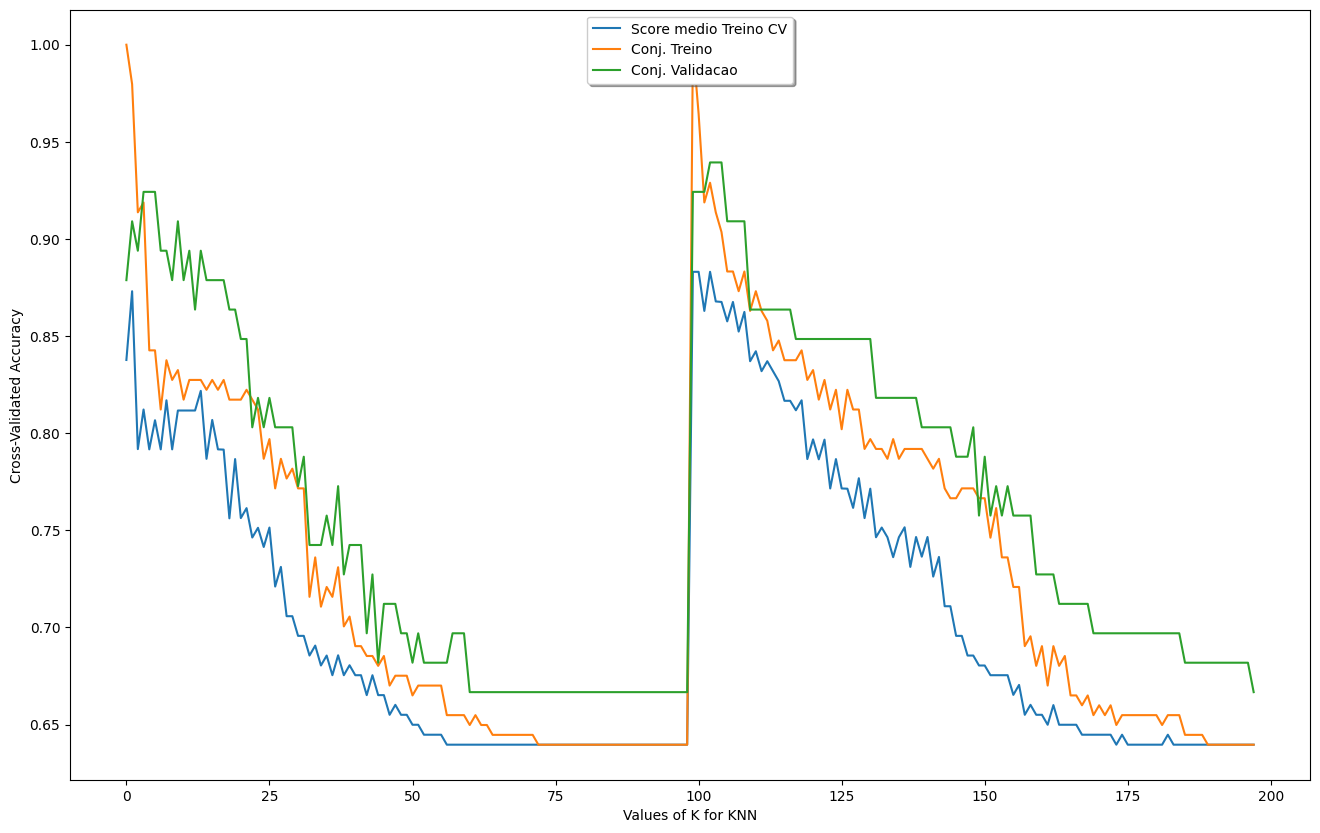

Acuracia de treinamento clf: 0.843
Acuracia de validacao clf: 0.924
Acuracia de teste clf: 0.852


In [2]:
#
#
# USANDO O K-NN NA BASE DE DADOS DO DIABETES
# ESCOLHENDO VARIOS K'S PARA A BASE
#

import pandas
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
plt.rcParams['figure.figsize'] = [16, 10]
import random

#usando o metodo para criar os conjuntos de treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 10)

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier()

#treinando o classificador
clf = clf.fit(X_train, y_train)

#construindo o espaco de busca por configuracoes do classificador
k_range = range(1, 100) #k
k_scores_train = []
k_scores_train_full = []
k_scores_valid = []
vet_distancias = ["euclidean", "manhattan"]
#p_range = range(1, 198) #k
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in vet_distancias:
  for j in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=j, metric=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores_train.append(scores.mean())
    knn.fit(X_train, y_train)
    k_scores_train_full.append(knn.score(X_train, y_train))
    k_scores_valid.append(knn.score(X_valid, y_valid))

# plot to see clearly
plt.plot(list(range(0,len(k_scores_train))), k_scores_train)
plt.plot(list(range(0,len(k_scores_train_full))), k_scores_train_full)
plt.plot(list(range(0,len(k_scores_valid))), k_scores_valid)
plt.legend(('Score medio Treino CV', 'Conj. Treino', 'Conj. Validacao'),
           loc='upper center', shadow=True)
plt.xlabel('Values of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

print("Acuracia de treinamento clf: %0.3f" %  clf.score(X_train, y_train))
print("Acuracia de validacao clf: %0.3f" %  clf.score(X_valid, y_valid))
print("Acuracia de teste clf: %0.3f" %  clf.score(X_test, y_test))
